# Lab 3: Classifiers

In this lab we will get more comfortable setting up various classifiers in #.

## Goals of the lab:
* Learn to use the _glm_ function for logistic regression
* Learn to use the _lda_ and _qda_ functions for doing discriminant analysis
* Learn to use the _knn_ function for doing kNN classification

This lab draws from the practice sets at the end of Chapter 4 in James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013). "An introduction to statistical learning: with applications in r." 

---
# Logistic regression with glm

For the first part of the lab we will use the generalized linear model (_glm_) function to perform logistic regression. [GLM](https://en.wikipedia.org/wiki/Generalized_linear_model) is a way of formalizing all forms of linear models when the underlying statistical distribution falls within the [exponential family](https://en.wikipedia.org/wiki/Exponential_family). The linear regression models we have discussed so far in this class are a type of _GLM_, as is logistic regression.

<br>

## Predicting the stock market

For the logistic regression exercises, we will play with the S&P stock market data included with the ISLR library.

The this dataset contains daily observations (n=1250) for the S&P 500 index between 2001 & 2005. The variables in this data set include:

* **Year:** The year that the observation was recorded

* **Lag1:** Percentage return for previous day

* **Lag2:** Percentage return for 2 days previous

* **Lag3:** Percentage return for 3 days previous

* **Lag4:** Percentage return for 4 days previous

* **Lag5:** Percentage return for 5 days previous

* **Volume:** Volume of shares traded (number of daily shares traded in billions)

* **Today:** Percentage return for today

* **Direction:** A factor with levels Down and Up indicating whether the market had a positive or negative return on a given day



In [19]:
# Load the library
library(ISLR)

# Uncomment the line below if you want to learn more about the dataset
#help(Smarket)

# Let's take a look at the distribution of our variables
summary(Smarket)

      Year           Lag1                Lag2                Lag3          
 Min.   :2001   Min.   :-4.922000   Min.   :-4.922000   Min.   :-4.922000  
 1st Qu.:2002   1st Qu.:-0.639500   1st Qu.:-0.639500   1st Qu.:-0.640000  
 Median :2003   Median : 0.039000   Median : 0.039000   Median : 0.038500  
 Mean   :2003   Mean   : 0.003834   Mean   : 0.003919   Mean   : 0.001716  
 3rd Qu.:2004   3rd Qu.: 0.596750   3rd Qu.: 0.596750   3rd Qu.: 0.596750  
 Max.   :2005   Max.   : 5.733000   Max.   : 5.733000   Max.   : 5.733000  
      Lag4                Lag5              Volume           Today          
 Min.   :-4.922000   Min.   :-4.92200   Min.   :0.3561   Min.   :-4.922000  
 1st Qu.:-0.640000   1st Qu.:-0.64000   1st Qu.:1.2574   1st Qu.:-0.639500  
 Median : 0.038500   Median : 0.03850   Median :1.4229   Median : 0.038500  
 Mean   : 0.001636   Mean   : 0.00561   Mean   :1.4783   Mean   : 0.003138  
 3rd Qu.: 0.596750   3rd Qu.: 0.59700   3rd Qu.:1.6417   3rd Qu.: 0.596750  
 Max. 

In [ ]:
# Next let's actually quantify all pairwise correlations
cxy = cor(Smarket)

Why did we get an error above? Because not all of the variables are continuous. Specifically _Direction_ is binary (i.e., "up" or "down")

In [6]:
# Look at the column for Direction
Smarket[1:10,9]

[1] Up   Up   Down Up   Up   Up   Down Up   Up   Up  
Levels: Down Up

In [7]:
# In order to see the correlation let's remove the Direction variable
cxy = cor(Smarket[,-9]) 
cxy

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.00000000,0.029699649,0.030596422,0.033194581,0.035688718,0.029787995,0.53900647,0.030095229
Lag1,0.02969965,1.000000000,-0.026294328,-0.010803402,-0.002985911,-0.005674606,0.04090991,-0.026155045
Lag2,0.03059642,-0.026294328,1.000000000,-0.025896670,-0.010853533,-0.003557949,-0.04338321,-0.010250033
Lag3,0.03319458,-0.010803402,-0.025896670,1.000000000,-0.024051036,-0.018808338,-0.04182369,-0.002447647
Lag4,0.03568872,-0.002985911,-0.010853533,-0.024051036,1.000000000,-0.027083641,-0.04841425,-0.006899527
Lag5,0.02978799,-0.005674606,-0.003557949,-0.018808338,-0.027083641,1.000000000,-0.02200231,-0.034860083
Volume,0.53900647,0.040909908,-0.043383215,-0.041823686,-0.048414246,-0.022002315,1.00000000,0.014591823
Today,0.03009523,-0.026155045,-0.010250033,-0.002447647,-0.006899527,-0.034860083,0.01459182,1.000000000


This gives us a sense of the relationship between the variables. While Volume and Year appear to be highly correlated (r=0.539) the rest of the variables appear to be weakly correlated at best.

So now, let's use the built in _glm_ function to test the following model.
$$ y_{direction} = \beta_0 + \beta_1 x_{lag1} + \beta_2 x_{lag2} + \beta_3 x_{lag3} +\\
 \beta_4 x_{lag4} + \beta_5 x_{lag5} + \beta_6 + x_{Volume} + \epsilon $$

This model tries to predict whether the stock market will end higher or lower on one day given the percent returns on the previous 5 days and the overall volume of shares traded.

For this analysis we need to define how $Y$ (Direction) is distributed. For logistic regression we say that $Y$ is binomially distributed (i.e., it arises from a [binomial distribution](https://en.wikipedia.org/wiki/Binomial_distribution).

In [9]:
# Attach the variables to the workspace
attach(Smarket)

# Run the GLM.
glm.fit=glm(Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume, data=Smarket, family=binomial)

# Summarize
summary(glm.fit)

The following objects are masked from Smarket (pos = 3):

    Direction, Lag1, Lag2, Lag3, Lag4, Lag5, Today, Volume, Year




Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = binomial, data = Smarket)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.446  -1.203   1.065   1.145   1.326  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)
(Intercept) -0.126000   0.240736  -0.523    0.601
Lag1        -0.073074   0.050167  -1.457    0.145
Lag2        -0.042301   0.050086  -0.845    0.398
Lag3         0.011085   0.049939   0.222    0.824
Lag4         0.009359   0.049974   0.187    0.851
Lag5         0.010313   0.049511   0.208    0.835
Volume       0.135441   0.158360   0.855    0.392

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1731.2  on 1249  degrees of freedom
Residual deviance: 1727.6  on 1243  degrees of freedom
AIC: 1741.6

Number of Fisher Scoring iterations: 3


As you can see, if we accept an $\alpha = 0.05$ (i.e., p < 0.05 for determining statistical significance), then it doesn't appear that the previous day's performance or overall trading volume predicts whether the market ends up or down on a given day.

Let's take a closer look at the model fits themselves.

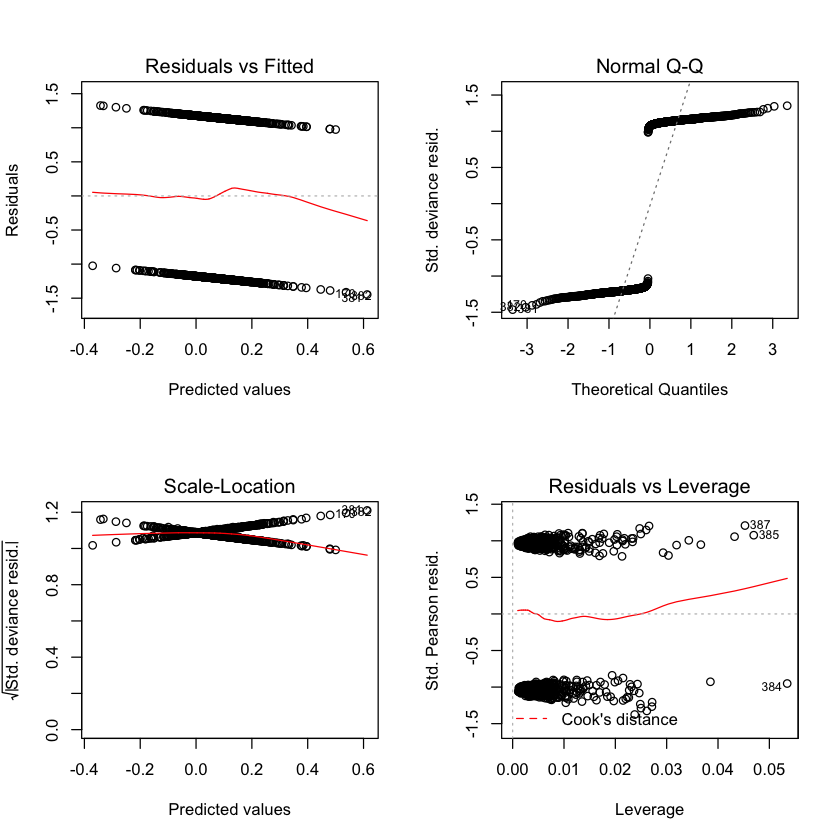

In [10]:
# Plot the results in a 2x2 grid
op <- par(mfrow=c(2,2))

# Plot the model fit evaluation images
plot(glm.fit)

It appears that there are some high leverage points. But clearly, most of the other model fit evaluations that we used for linear regression don't seem to work for the logistic family.

We can also query whether the model fit itself is significant. How do we do that? Use _prediction_.

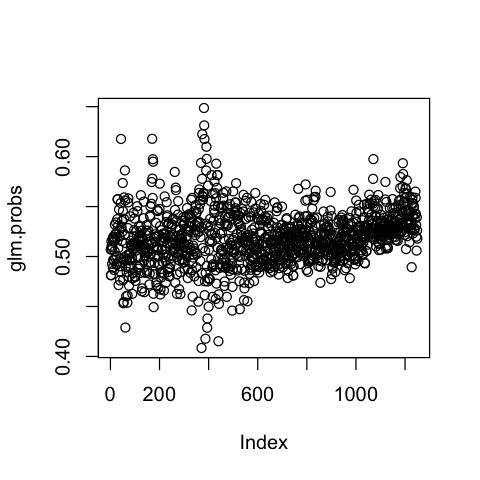

In [14]:
# See how well the model captured the training set
glm.probs = predict(glm.fit, type = "response")

# Setting type="response" tells R to output probabilties from P(Y=1,X) for all values of X
# "If no data set is supplied to the predict() function, then the probabilities 
# are computed for the training data that was used to fit the logistic regression model."

# Let's visualize this
options(repr.plot.width=4, repr.plot.height=4)
plot(glm.probs)

What we are showing here are the predicted Y values for our full model. Notice that they are not binary. Why? Because we are estimating Y as a sigmoid function. Thus, to make a binary prediction you need to set a _threshold_ for Y that you use to determine whether it is 0 or 1. Let's try that.

In [16]:
# We know that these are the probabilites that the Stock Market will go up because we 
# can check out R categrozed the Direction variable using contrasts()
contrasts(Direction)


,Up
Down,0
Up,1


In [17]:
# Instead let's make a prediction on a particular day that the stockmarket will go
# up or down

# First make a list of "Downs"
glm.pred=rep("Down",1250)

# Then use the glm.probs output to predict the up days. Let's use a threshold of 50% probability
glm.pred[glm.probs>.5]="Up"

# Now let's compare our prediction accuracy
table(glm.pred, Direction)

        Direction
glm.pred Down  Up
    Down  145 141
    Up    457 507

This table is sometimes call the _confusion matrix_. The diagonal values are the frequency of the correct predictions and the off diagonal are the errors. We can estimate the overall accuracy by either summing the diagonal values and deviding by $n$ (i.e., (145+507)/1250) or more directly by seeing the average number of times the predicted value matched the observed.

In [18]:
# We can calculate our predition accuracy by counting the number of times our
# prediction vector matched the real data
mean(glm.pred==Direction)

[1] 0.5216

This means that we are correct 52% of the time in estimating whether the market will end up or down on a given day. At first glance this appears to be doing better than chance (50%). However, rmemember, this is the error on the _training_ data. So the actual performance of this model at predicting the stock market in the future (i.e., _test_ accuracy) may be lower.

Let's try a case where we try to predict the market performance in 2005, using the pre-2005 data.

In [20]:
# Let's isolate the years before 2005 to use as a training set to predict market change in 2005

# First setup an index vector to find the entries corresponding to years 2001-2005
train=(Year<2005)

# Can now make a whole new Smarket dataset just for 2005
Smarket.2005 = Smarket[!train,]

# The ! indicates "not" int eh train set
dim(Smarket.2005)

# Now let's extract the Direction for just 2005
Direction.2005=Direction[!train]

[1] 252   9

For simplicity sake, let's only use the previous two days' performance to predict the current stock market peformance. In other words this model:
$$ y_{direction} = \beta_0 + \beta_1 x_{lag1} + \beta_2 x_{lag2} + \epsilon $$


In [22]:
# Learn the logistic model, but use only the subset of the data from pre-2005 (i.e., train)
glm.fit=glm(Direction~Lag1+Lag2, data=Smarket, family=binomial, subset=train)

# Predict the 2005 performance from the model trained on the pre-2005 data
glm.probs=predict(glm.fit, Smarket.2005, type="response")
glm.pred=rep("Down",252) # There are only 252 observations in the training set.
glm.pred[glm.probs>0.5]="Up"

# Show the confusion matrix
table(glm.pred, Direction.2005)

        Direction.2005
glm.pred Down  Up
    Down   35  35
    Up     76 106

In [23]:
# Now let's look at the training acuracy
mean(glm.pred==Direction.2005)

[1] 0.5595238

So this isn't too bad. We can reliably predict slightly above chance the 2005 performance from a model trained on the previous years.

---
# 2. LDA

Let's now move on to using LDA. The _lda_ function is built in to the MASS library that we used in the last lab. We'll use that one here (although there are other LDA libraries that you can install if you'd like).

First let's replicate our prediction problem using the stock market data.

Call:
lda(Direction ~ Lag1 + Lag2, data = Smarket, subset = train)

Prior probabilities of groups:
    Down       Up 
0.491984 0.508016 

Group means:
            Lag1        Lag2
Down  0.04279022  0.03389409
Up   -0.03954635 -0.03132544

Coefficients of linear discriminants:
            LD1
Lag1 -0.6420190
Lag2 -0.5135293

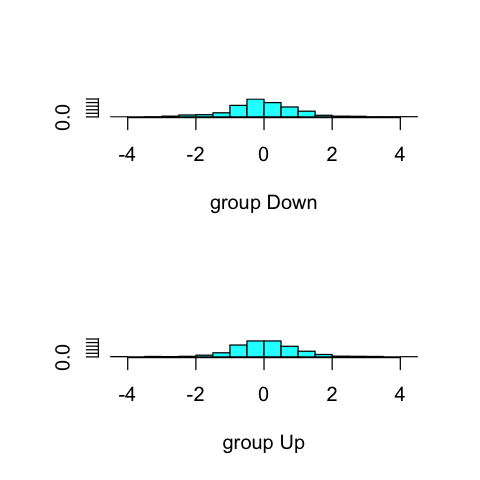

In [24]:
library(MASS)

# LDA fitting is just like linear regression fitting in it's form.
# Let's do it on the training subset now
lda.fit = lda(Direction~Lag1+Lag2, data=Smarket, subset=train)
lda.fit # The summary() function gives you something different
plot(lda.fit)


This indicates that 49.2% of the trainnig observations correspond to days during which the market went down

The coefficients of linear discriminants indicate the distance of each value from
the discrimination boundary.

1. If $w_1*x_{Lag1} - w_2*x_{Lag2}$ is positive, then the classifier predicts the market will increase 
2. If $w_1*x_{Lag1} - w_2*x_{Lag2}$ is negative, then the classifier predicts the market will decrease

Now let's use LDA to predict the market values in 2005

In [26]:
# Predict from your LDA coefficients
lda.pred = predict(lda.fit, Smarket.2005)

# We next extract the output of the prediction 
lda.class = lda.pred$class
table(lda.class, Direction.2005)
mean(lda.class==Direction.2005)

         Direction.2005
lda.class Down  Up
     Down   35  35
     Up     76 106

[1] 0.5595238

So we now see that the LDA is performing just as good as the logistic regression at 56% test set accuracy.

Another way to evaluate the LDA is by looking at the posterior probabilty from the model. This is analogous (although not identical) to the $\hat{y}$ in logistic regression. 

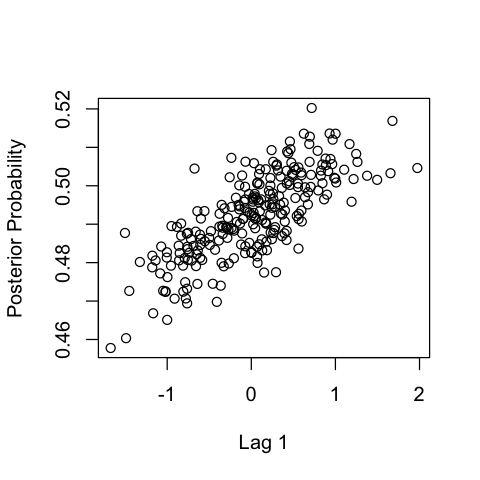

In [39]:
# Show the relationship between the Lag 1 variable (2nd column in Smarket.2005) 
# and the posterior probability from LDA
plot(Smarket.2005[,2], lda.pred$posterior[,1], xlab="Lag 1", ylab="Posterior Probability")

LDA determines the group assignment by assigning above and below the 50% (0.5) posterior probabiltiy. In otherwords if the posterior probability is >=0.5, then it assigns one value, otherwise it assigns the other.

---
# QDA

Remember that QDA is a special case of LDA where you do not assume that the underlying distributions have equal variances. So let's use QDA for the same problem we have been working on so far.

In [42]:
# QDA is also part of the MASS library
qda.fit = qda(Direction~Lag1+Lag2, data=Smarket, subset=train)
qda.fit

# Same basic predictions as LDA, just assuming that each
# distribution has it's own variance. But work with 
# coefficients the same way.
qda.class=predict(qda.fit, Smarket.2005)$class
table(qda.class, Direction.2005)
mean(qda.class==Direction.2005)

Call:
qda(Direction ~ Lag1 + Lag2, data = Smarket, subset = train)

Prior probabilities of groups:
    Down       Up 
0.491984 0.508016 

Group means:
            Lag1        Lag2
Down  0.04279022  0.03389409
Up   -0.03954635 -0.03132544

         Direction.2005
qda.class Down  Up
     Down   30  20
     Up     81 121

[1] 0.5992063

Notice that QDA is doing slightly better than LDA, with a test accuracy of 60%. 

---
# kNN Classification

Remember how kNN works. We don't learn a model and then fit the predictions. Instead we do everything in 1 fell swoop.

Four inputs are necessary for this.
1. A matrix containing the predictors associated with the training data, labeled train.X below.
2. Amatrix containing the predictors associated with the data for which we wish to make predictions (labeled test.X below).
3. A vector containing the class labels for the training observations, labeled train.Direction below.
4. A value for _k_, the number of nearest neighbors to be used by the classifier



In [47]:
# First have to load the classifier libary
library(class)

# Use cbind() to bind the lag1 and lag2 vectors into a single matrix. Just for training data
train.X = cbind(Lag1, Lag2)[train,]

# Same for test
test.X = cbind(Lag1, Lag2)[!train,]

# Now let's get the response variable 
train.Direction = Direction[train]

# Set the randomization seed
set.seed(1)

# Now let's look at closest neighbors
knn.pred=knn(train.X, test.X, train.Direction, k=1)
table(knn.pred,Direction.2005)

# Get the accuracy from the table
sum(diag(table(knn.pred, Direction.2005)))/252

        Direction.2005
knn.pred Down Up
    Down   43 58
    Up     68 83

[1] 0.5

Notice that accuracy is exactly 50%. So basically _k=1_ is too flexible. Let's play with some other values of _k_


In [48]:
# Change to k=3
knn.pred=knn(train.X, test.X, train.Direction, k=3)
table(knn.pred, Direction.2005)

# Accuracy is a little better 53%
sum(diag(table(knn.pred, Direction.2005)))/252

        Direction.2005
knn.pred Down Up
    Down   48 54
    Up     63 87

[1] 0.5357143

Now we are at 53% accuracy. So slightly better. Let's look across a range of k.

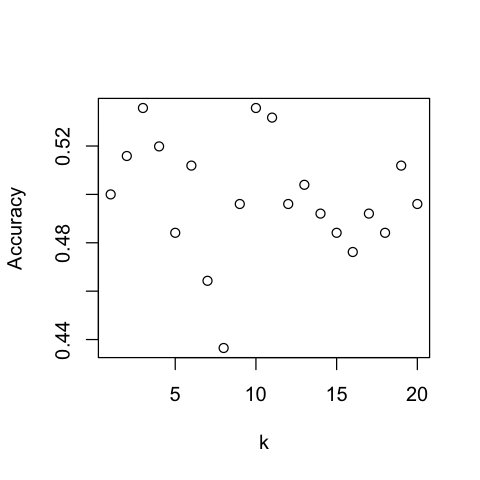

In [53]:
# Use a for loop to sample a range of k values.
n_val = 20
acc = numeric(length=n_val)
for (kval in 1:n_val) {
    knn.pred=knn(train.X, test.X, train.Direction, k=kval)
    acc[kval] = sum(diag(table(knn.pred, Direction.2005)))/252
}

# plot the results
plot(1:n_val, acc, xlab="k", ylab="Accuracy")

So as you can see, we don't really get a smooth function on the test accuracies as k increases. It just osciallates around chance. What does that mean? Well... kNN isn't useful here. 

<br>

Since this didn't work out so well, let's play with another dataset. For this we'll use the Caravan dataset included in the ISLR library.

In [58]:
# To see the info on this data set uncomment the line below
#help(Caravan)

This data set contains 5822 customr records and 86 variables on socioeconomic information and product ownership.

In [59]:
dim(Caravan)

[1] 5822   86

The last variable in this data set is the Purchase variable. It indicates whether a customer purchased an insurance policy or not. So let's see if we can predict the probability that a customre will purchase a policy given all of the other variables in the dataset.

In [61]:
# Put the dataset in the workspace
attach(Caravan)

# We'll want to standardize all of the otehr variables but Purchase (column 86)
# For this we'll use the scale() function.
# help(scale) # Uncomment this line to see how scale works
standardized.X=scale(Caravan[,-86])

# Now let's determine our test and train set
test = 1:1000
train.X = standardized.X[-test,]
test.X  = standardized.X[test,]
train.Y = Purchase[-test]
test.Y  = Purchase[test]
set.seed(1)
knn.pred=knn(train.X, test.X, train.Y, k = 1,prob=TRUE)


The following objects are masked from Caravan (pos = 3):

    AAANHANG, ABESAUT, ABRAND, ABROM, ABYSTAND, AFIETS, AGEZONG,
    AINBOED, ALEVEN, AMOTSCO, APERSAUT, APERSONG, APLEZIER, ATRACTOR,
    AVRAAUT, AWABEDR, AWALAND, AWAOREG, AWAPART, AWERKT, AZEILPL,
    MAANTHUI, MAUT0, MAUT1, MAUT2, MBERARBG, MBERARBO, MBERBOER,
    MBERHOOG, MBERMIDD, MBERZELF, MFALLEEN, MFGEKIND, MFWEKIND,
    MGEMLEEF, MGEMOMV, MGODGE, MGODOV, MGODPR, MGODRK, MHHUUR, MHKOOP,
    MINK123M, MINK3045, MINK4575, MINK7512, MINKGEM, MINKM30, MKOOPKLA,
    MOPLHOOG, MOPLLAAG, MOPLMIDD, MOSHOOFD, MOSTYPE, MRELGE, MRELOV,
    MRELSA, MSKA, MSKB1, MSKB2, MSKC, MSKD, MZFONDS, MZPART, PAANHANG,
    PBESAUT, PBRAND, PBROM, PBYSTAND, PFIETS, PGEZONG, PINBOED, PLEVEN,
    PMOTSCO, PPERSAUT, PPERSONG, PPLEZIER, PTRACTOR, Purchase, PVRAAUT,
    PWABEDR, PWALAND, PWAOREG, PWAPART, PWERKT, PZEILPL



In [62]:
# Now let's compare the predicted versus observed rate of not buying insurance
mean(test.Y!=knn.pred)
mean(test.Y!="No")
table(knn.pred, test.Y)

# What is the overall accuracy?
sum(diag(table(knn.pred,test.Y)))/dim(test.X)[1]

[1] 0.118

[1] 0.059

        test.Y
knn.pred  No Yes
     No  873  50
     Yes  68   9

[1] 0.882

Notice that we have an 82% accuracy rate if we just look at the diagonal. But let's take a closer look at this performance.

In [66]:
# What is the accuracy just of those who buy insurance?
table(knn.pred, test.Y)[2,2]/sum(table(knn.pred, test.Y)[2,])


[1] 0.1168831

This means the model only predicted someone would by insurance 9 times out the 77 (i.e., 68+9) times people actually bought insurance. So our high estimate of model accuracy above is driven by the fact that **most** people (92.3%) did not buy insurance at all. So the model is biased to say "no" more often and be right most of the time.

So the take home lesson from this example is that _overall accuracy_ is a poor benchmark of a model performance. You need to:

* Pay attention to base rates of outcomes (e.g., probability people bought insurance)
* Evaluate the model along the appropriate dimension for your hypothesis (e.g., likelihood that people will buy insurnace).